In [2]:
# Change into the root directory of the project
import os
if os.getcwd().split("/")[-1] == "examples":
    os.chdir('..')

%load_ext autoreload
%autoreload 2

import logging
logger = logging.getLogger()
logger.setLevel(logging.INFO)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [3]:
# !pip install brian2
# !pip install matplotlib

In [4]:
import mopet
import random as r
import matplotlib.pyplot as plt
from brian2 import *

In [5]:
def model(params):
    """Defines and runs a Brian2 model parameterized by `params`.

    :param params: dict passed by mopet containing specific values of one combination.
    :return: dict containing simulation results.
    """
    tau = params.get("tau", 20)*ms
    n = 100
    b = params.get("b", 1.2) # constant current mean, the modulation varies
    freq = 10*Hz

    eqs = '''
    dv/dt = (-v + a * sin(2 * pi * freq * t) + b) / tau : 1
    a : 1
    '''
    neurons = NeuronGroup(n, model=eqs, threshold='v > 1', reset='v = 0',
                          method='euler')
    neurons.v = 'rand()'
    neurons.a = '0.05 + 0.7*i/n'
    S = SpikeMonitor(neurons)
    trace = StateMonitor(neurons, 'v', record=50)

    network = Network(neurons, S, trace)
    network.run(1000*ms)

    device.reinit()

    return {
        "spikes": S.num_spikes,
        "trace": trace.v,
        # TODO: replace by an actual metric
        "metric": r.gauss(3, 0.5)
    }

In [6]:
# Test if model runs with default values
model({})

{'spikes': 2755,
 'trace': array([[0.44671259, 0.45047903, 0.4542392 , ..., 0.89480749, 0.89629575,
         0.89778914]]),
 'metric': 2.671731889936507}

In [7]:
# TODO:
# * Define model that we can explore
# * Select a metric, e.g. phase synchronization
# * Select two exploration parameters

In [8]:
explore_params = {
    "tau_e": np.linspace(10, 20, 5),
    "b_e": np.linspace(1., 2., 5),
 }

ex = mopet.Exploration(model, explore_params, exploration_name="brian2", hdf_filename="brian2.h5")


In [9]:
ex.run()

2021-02-03 22:02:54,274	INFO resource_spec.py:212 -- Starting Ray with 9.28 GiB memory available for workers and up to 4.64 GiB for objects. You can adjust these settings with ray.init(memory=<bytes>, object_store_memory=<bytes>).
2021-02-03 22:02:54,506	WARNING services.py:923 -- Redis failed to start, retrying now.
2021-02-03 22:02:54,762	INFO services.py:1165 -- View the Ray dashboard at localhost:8265
INFO:root:Starting 25 jobs.
100%|██████████| 25/25 [00:00<00:00, 1138.02it/s]
INFO:root:Runs took 0.031694650650024414 s to submit.
100%|██████████| 25/25 [00:09<00:00,  2.67it/s]
INFO:root:Runs and storage took 9.380534887313843 s to complete.


In [10]:
ex.load_results(all=True)

INFO:root:brian2.h5 opened for reading.
INFO:root:Gettings runs of exploration ``brian2``
100%|██████████| 25/25 [00:00<00:00, 396.62it/s]
INFO:root:Creating new results DataFrame
INFO:root:Aggregating scalar results ...
100%|██████████| 25/25 [00:00<00:00, 361.15it/s]
INFO:root:brian2.h5 closed.


In [11]:
ex.params

{0: {'b_e': 1.0, 'tau_e': 10.0},
 1: {'b_e': 1.25, 'tau_e': 10.0},
 10: {'b_e': 1.0, 'tau_e': 15.0},
 11: {'b_e': 1.25, 'tau_e': 15.0},
 12: {'b_e': 1.5, 'tau_e': 15.0},
 13: {'b_e': 1.75, 'tau_e': 15.0},
 14: {'b_e': 2.0, 'tau_e': 15.0},
 15: {'b_e': 1.0, 'tau_e': 17.5},
 16: {'b_e': 1.25, 'tau_e': 17.5},
 17: {'b_e': 1.5, 'tau_e': 17.5},
 18: {'b_e': 1.75, 'tau_e': 17.5},
 19: {'b_e': 2.0, 'tau_e': 17.5},
 2: {'b_e': 1.5, 'tau_e': 10.0},
 20: {'b_e': 1.0, 'tau_e': 20.0},
 21: {'b_e': 1.25, 'tau_e': 20.0},
 22: {'b_e': 1.5, 'tau_e': 20.0},
 23: {'b_e': 1.75, 'tau_e': 20.0},
 24: {'b_e': 2.0, 'tau_e': 20.0},
 3: {'b_e': 1.75, 'tau_e': 10.0},
 4: {'b_e': 2.0, 'tau_e': 10.0},
 5: {'b_e': 1.0, 'tau_e': 12.5},
 6: {'b_e': 1.25, 'tau_e': 12.5},
 7: {'b_e': 1.5, 'tau_e': 12.5},
 8: {'b_e': 1.75, 'tau_e': 12.5},
 9: {'b_e': 2.0, 'tau_e': 12.5}}

In [12]:
ex.df

,b_e,tau_e,metric,trace
0,1,10,2.926179,"[[0.5148905809177547, 0.518316128013166, 0.521..."
1,1.25,10,3.432084,"[[0.5977121360753959, 0.6007235753950189, 0.60..."
10,1,15,2.484533,"[[0.16821764963137054, 0.1733765613832137, 0.1..."
11,1.25,15,2.609027,"[[0.43913024643033616, 0.44293459519818446, 0...."
12,1.5,15,2.658088,"[[0.054215300618361884, 0.059944224115270076, ..."
13,1.75,15,2.051392,"[[0.1200261452984529, 0.12542601457196065, 0.1..."
14,2,15,2.753020,"[[0.6171896666184423, 0.6201037182853502, 0.62..."
15,1,17.5,3.110651,"[[0.026429144847883723, 0.0322969991236443, 0...."
16,1.25,17.5,3.003202,"[[0.6278581000626245, 0.6307188095623114, 0.63..."
17,1.5,17.5,3.020776,"[[0.33985533343162455, 0.3441560567644664, 0.3..."


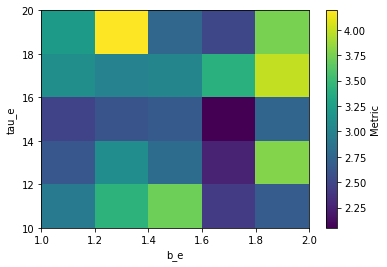

In [19]:
pivoted = ex.df.pivot_table(values='metric', index = 'tau_e', columns='b_e')
plt.imshow(
    pivoted,
    extent = [
        min(ex.df.b_e), max(ex.df.b_e),
        min(ex.df.tau_e), max(ex.df.tau_e)
    ],
    origin='lower',
    aspect='auto'
)
plt.colorbar(label='Metric')
plt.xlabel("b_e")
plt.ylabel("tau_e")
plt.show()